# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [100]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Carga de librerías 

In [101]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model  
import sklearn.metrics 
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [102]:
df = pd.read_csv('insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [103]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [104]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
886,0,18.0,46900.0,1,0
855,0,29.0,26600.0,0,0
2255,1,43.0,48300.0,0,1
3398,1,28.0,67100.0,1,0
3060,0,20.0,36600.0,1,0
3745,1,37.0,38500.0,0,0
4337,0,29.0,33600.0,2,0
4177,1,27.0,29900.0,1,0
152,0,26.0,37700.0,3,0
148,0,28.0,39000.0,1,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Nuestro DataFrame o Dataset está distribuido en `características` y un `objetivo`, los cuales están definidos de la siguiente manera:

- *Características* 
    - `gender`: Sexo del cliente y/o asegurado
    - `age`: Edad del cliente y/o asegurado
    - `income`: Ingresos del cliente y/o asegurado
    - `family_members`: Miembros que confirma la familia del interesado

- *Objetivo*
    - `insurance_benefits`: Este es la cantidad de beneficios recibidos por la persona asegurada

Como tal es la información, a priori, a destacar de nuestro DataFrame.

In [106]:
# puede que queramos cambiar el tipo de edad (de float a int) 

df['age'] = df['age'].astype(int)

In [107]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [108]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.
# ¿Se ve todo bien?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Realmente no hay algo anormal en cuanto a los datos, y esto lo podemos apreciar en el análisis ecploratorio de datos, como sigue...

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

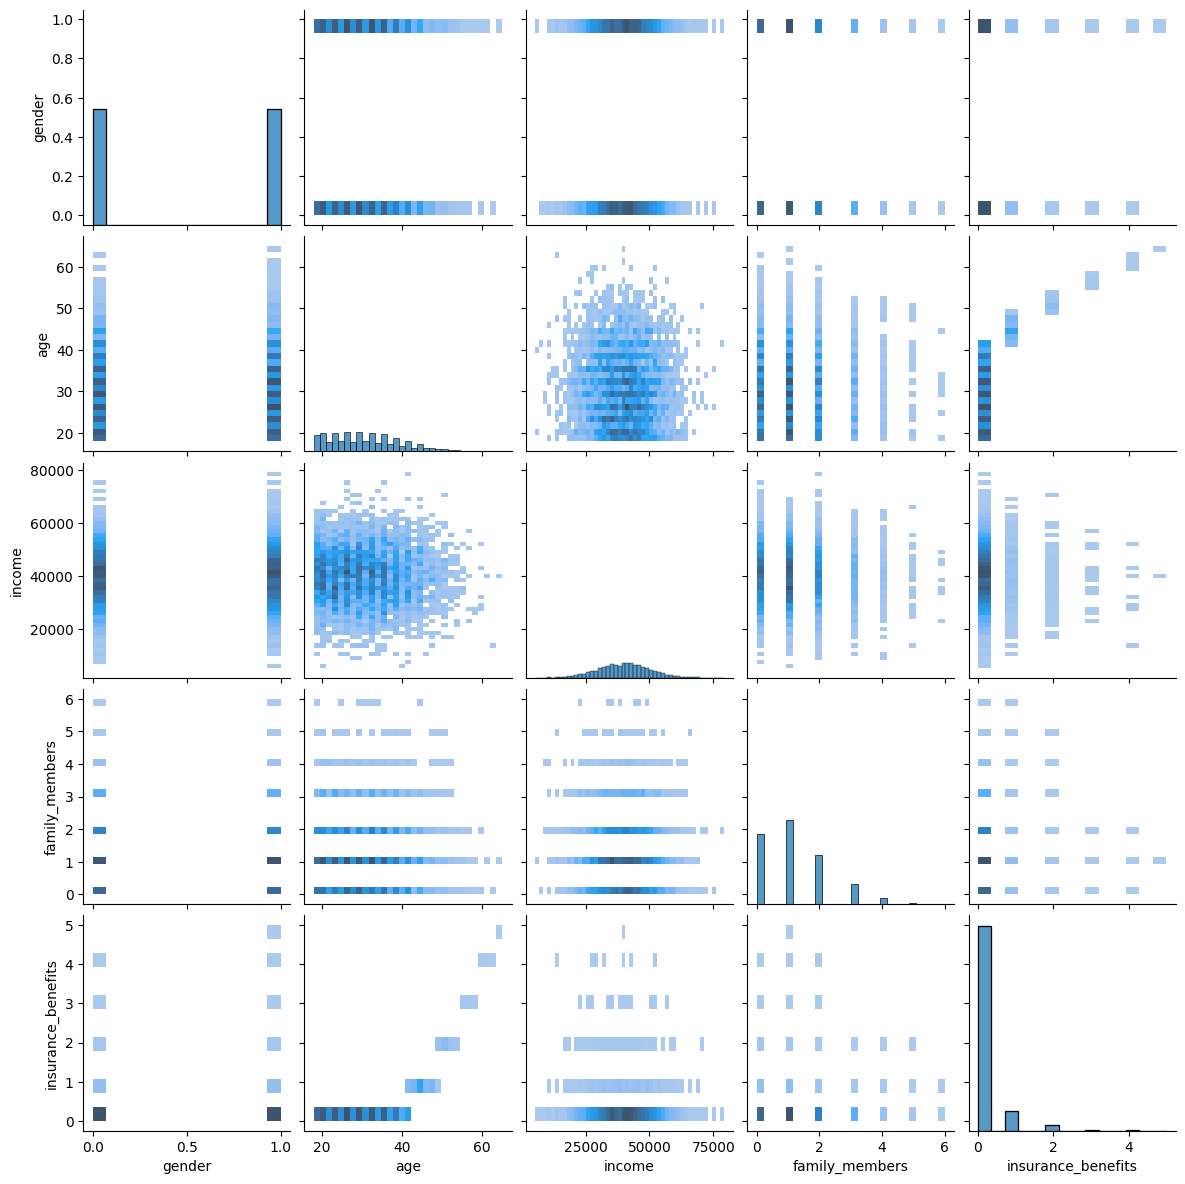

In [109]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)
- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos
  - Escalado
    - los datos no están escalados
    - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
    - Euclidiana
    - Manhattan

Responde a estas preguntas:
- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [110]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [111]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: número de objetos para los que se buscan los vecinos más cercanos   
    :param k: número de vecinos más cercanos a devolver
    :param metric: nombre de la métrica de distancia    
    """
    # p es el parámetro de la distancia de acuerdo a la conveniencia de la documentación de sklearn
    if metric == 'euclidean':
        p = 2
    elif metric == 'manhattan':
        p = 1

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=n, metric=metric, p=p)
    nbrs.fit(df[feature_names])
    
    nbrs = nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [112]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

C:\Users\Ariel\AppData\Local\Temp\ipykernel_17724\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\Ariel\AppData\Local\Temp\ipykernel_17724\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [113]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4376,1,0.400000,0.436709,0.000000,0
4950,1,0.446154,0.532911,0.666667,0
4526,0,0.476923,0.587342,0.000000,0
985,0,0.569231,0.293671,0.000000,0
2252,0,0.553846,0.591139,0.333333,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación.
Es decir, tendremos la combinación de las características estandarizadas o escaladas con ``MaxAbsScaler`` con el parámetro de distancia ``Manhattan`` o ``Euclidean``, y por otro lado, ocuparemos la función sin tener escaladas las características, de forma original.

Para esto, realicemos una partición de los casos tal y como se realiza en las siguientes líneas o secciones.

Antes de ir con la implementación de nuestra función, sería conveniente buscar un cliente en particular, el cual tendrá relevancia al llamar a nuestra función, en otras palabras, aplicaremos la función para que halle aquellos clientes que sean iguales al de referencia.

Tiene sentido respecto al nombre de nuestra función, _vecinos cercanos_.

In [114]:
#Tomando en cuenta lo anterior, tomemos un cliente de nuestro dataframe original

print('Cliente de referencia')
print()
print([df.iloc[10][feature_names]])

Cliente de referencia

[gender                1.0
age                  25.0
income            36600.0
family_members        1.0
Name: 10, dtype: float64]


Hemos elegido de forma aleatoria nuestro cliente que tiene la información asociada al anterior salida.

Veamos cómo nuestra función funciona teniendo en cuenta nuestro cliente de referencia, y además, cómo los parámetros de la función nos pueden ayudar a hallar a estos _clientes similares_ o *vecinos cercanos*.

## Implementación de la función kNN _sin_ escalamiento de datos

In [115]:
#Caso 1: Sin escalamiento y con distancia euclidiana, p = 2
#Solo retornaremos la función con los parámetros delimitados

get_knn(df, 10, 5, 'euclidean')


c:\Users\Ariel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
10,1,25,36600.0,1,0,0.000000
4039,1,25,36600.0,2,0,1.000000
2037,1,26,36600.0,0,0,1.414214
3247,1,26,36600.0,2,0,1.414214
1508,0,26,36600.0,0,0,1.732051


In [116]:
#Realicemos el mismo ejercicio, pero con el parámetro de distancia manhattan, p = 1

get_knn(df, 10, 5, 'manhattan')

c:\Users\Ariel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
10,1,25,36600.0,1,0,0.0
4039,1,25,36600.0,2,0,1.0
2037,1,26,36600.0,0,0,2.0
3247,1,26,36600.0,2,0,2.0
1508,0,26,36600.0,0,0,3.0


Interesante output para ambas métricas de distancia...

Ahora, volvamos a implementar el mismo ejercicio, sin embargo, para el siguiente par de casos pendientes tendremos nuestras características estandarizadas para que estas se encuentren en un rango de valores de [-1, 1]

## Implementación de la función kNN _con_ escalamiento de datos

In [117]:
#Caso 2: Con escalamiento y con distancia euclidiana, p = 2

get_knn(df_scaled, 10, 5, 'euclidean')

c:\Users\Ariel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
10,1,0.384615,0.463291,0.166667,0,0.000000
4377,1,0.384615,0.473418,0.166667,0,0.010127
1389,1,0.369231,0.464557,0.166667,0,0.015437
760,1,0.369231,0.462025,0.166667,0,0.015437
2254,1,0.400000,0.455696,0.166667,0,0.017157


In [118]:
#Una vez más, realicemos el mismo ejercicio, pero con el parámetro de distancia manhattan, p = 1

get_knn(df_scaled, 10, 5, 'manhattan')

c:\Users\Ariel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
10,1,0.384615,0.463291,0.166667,0,0.000000
4377,1,0.384615,0.473418,0.166667,0,0.010127
1389,1,0.369231,0.464557,0.166667,0,0.016650
760,1,0.369231,0.462025,0.166667,0,0.016650
2254,1,0.400000,0.455696,0.166667,0,0.022980


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Claro que sí, sí afecta el escalado a las características que están involucradas en el entrenamiento de un modelo, particularmente para el algoritmo de kNN, que se trata de ser homogéneo en sus valores numéricos.

Además de que el escalado nos ayuda a tener mejor precisión, ya que las características, de acuerdo a la estandarización, asegura que todas las características contribuyan de manera equitativa en la predición de un target u objetivo. 

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Al realizar una comparación de los clientes entre valores estandarizados y no, con la métrica de la distancia Manhattan, vemos que hay cierta coincidencia, sin embargo, considero que los valores sin el escalamiento tienen _más distancia_ respecto a los valores que están estandarizados.

En otras palabras, la distancia entre *sus vecinos cercanos* es relativamente mayor con los datos no escalados que en los que sí se aplica este paso.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.


Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [119]:
# сalcula el objetivo
df['insurance_benefits_received'] = df['insurance_benefits'] > 0
df_scaled['insurance_benefits_received'] = df_scaled['insurance_benefits'] > 0

Tomando en cuenta el punto de partida de que aquellos a los que reciben el beneficio seguro tienen el número 1, tal y como si fuese una clasificación binaria.

In [120]:
# comprueba el desequilibrio de clases con value_counts()
binary_benefits_rate = (df['insurance_benefits_received'].value_counts()/df.shape[0])*100
print(binary_benefits_rate)

insurance_benefits_received
False    88.72
True     11.28
Name: count, dtype: float64


Podemos apreciar que esta taza de quienes sí cuentan con el beneficio y quienes no.
**Tenemos que solamente el 11.28% de los clientes ha recibido este beneficio por parte del seguro.**

Se interpreta a partir de la mascara booleana que se ha creado.

A raíz de estos datos, podemos realizar nuestra separación de datos con la función ``train_test_split``, tal y como se menciona con la proporción 70 para entrenamiento (``train``) y 30 para prueba (``test``).


Importante mencionar que también tenemos involucrado a ambos conjuntos de datos, es decir, tanto escalados como no escalados para fines de la misma tarea.

## Separación de datos para los datos no escalados

In [121]:
#Separación de los datos en conjuntos de entrenamiento y prueba
#Recordemos que hemos agregado una columna más a nuestros datasets involucrados

target = df['insurance_benefits_received']
features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)

#Separación de los datos en conjuntos de entrenamiento y prueba

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)



## Separación de datos para los datos escalados

In [122]:
#Misma metodología, pero con el dataset escalado...

target_scaled = df_scaled['insurance_benefits_received']
features_scaled = df_scaled.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)

#Separación de los datos en conjuntos de entrenamiento y prueba para el dataset escalado

features_train_scaled, features_test_scaled, target_train_scaled, target_test_scaled = train_test_split(features_scaled, target_scaled, test_size=0.3, random_state=43)

## Generación del clasificador KNN

Para este caso podemos recurrir de dos caminos para generar nuestro clasificador:

- Construir una función con parámetros delmitados por los conjuntos de entrenamiento, prueba, número de vecinos y métrica de distancia. Cosa análoga que hemos hecho anteriormente.

- Construir un _loop_ teniendo contenido el módulo de clasificación de K-NN y delimitando los conjunto de entrenamiento y prueba.

Para ambos casos, se tiene en cuenta los datasets _escalado y no escalado_.

Por cuestiones de practicidad, elijo construir el bucle y llamar este módulo de clasificación de ``K - Nearest Neighbors``, entonces, vamos a ello.

In [123]:
#Construyamos nuestro bucle llamando al modulo mencionado previamente
#Vamos a almacenar los resultados obtenidos en dos listas diferentes

f1_score_no_scaling = []
f1_score_scaling = []

#Bucle para un rango de valores de 1 a 10:
for k in range(1, 11):
    #Para nuestro dataframe no escalado
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, p=2, metric = 'euclidean')
    knn.fit(features_train, target_train)
    predictions = knn.predict(features_test)
    f1_no_scaled = sklearn.metrics.f1_score(target_test, predictions)
    f1_score_no_scaling.append(f1_no_scaled)

    #Para el dataframe escalado / seguimos los pasos anteriores pero con el dataset escalado
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, p=2, metric = 'euclidean')
    knn.fit(features_train_scaled, target_train_scaled)
    predictions_scaled = knn.predict(features_test_scaled)
    f1_scaled = sklearn.metrics.f1_score(target_test_scaled, predictions_scaled)
    f1_score_scaling.append(f1_scaled)

print('F1 score sin escalado de datos:\n', f1_score_no_scaling)
print()
print('F1 score con escalado de datos:\n', f1_score_scaling)

F1 score sin escalado de datos:
 [0.6523297491039427, 0.37623762376237624, 0.3853211009174312, 0.15555555555555556, 0.16842105263157894, 0.09411764705882353, 0.11560693641618497, 0.024539877300613498, 0.036585365853658534, 0.036585365853658534]

F1 score con escalado de datos:
 [0.9565217391304348, 0.9310344827586207, 0.9497206703910615, 0.9367816091954023, 0.9497206703910615, 0.9310344827586207, 0.9375, 0.9186046511627907, 0.9310344827586207, 0.9058823529411765]


Está claro que hay una diferencia entre los valores del dataframe _escalado_ y _no escalado_ para nuestros valores de la métrica de clasificación ``F1 - Score``. 

Una de las primeras interpretaciones de este valor entre ambos dataframes es que, como sabemos, la estandarización de los valores no es la misma para ambas, lo cual genera esta diferencia sustancial en la métrica de referencia como ``F1 - Score``, todo en función de la métrica k:

- Podemos decir que en el caso de la métrica de ``F1-Score`` para nuestro dataset no escalado los valores cambian a medida que cambia la métrica k, si bien es cierto que es el objetivo, no es tan preciso, sobretodo haciendo hincapie en el escalado.

- Para el caso opuesto, en nuestro dataset escalado, dado que son datos más consistentes y homogéneos, nuestro valor de ``F1 - Score`` es más preciso y no hay mucha variabilidad. Además de que estos valores son cercanos a 1, lo cual índica precisión de los verdaderos positivos respecto a los falsos negativos y falsos positivos.

**Al revisar de forma visual, también podemos mencionar que los mejores valores para la métrica F1 - Score, son mejores, para ambos casos, para ``k = 1``.**


In [124]:
#Fijemos el modelo para el mejor valor de K = 1, tal como habiamos mencionado anteriormente
#Dataset escalado
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1, p=2, metric = 'euclidean')
knn.fit(features_train_scaled, target_train_scaled)
predictions_scaled = knn.predict(features_test_scaled)


#Dataset no escalado
knn.fit(features_train, target_train)
predictions = knn.predict(features_test)

In [125]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm.round(3))

In [126]:
#Aplicación de la función para el dataset escalado
eval_classifier(target_test_scaled, predictions_scaled)

F1: 0.96
Matriz de confusión
[[0.872 0.005]
 [0.006 0.117]]


In [127]:
#Aplicación de la función para el dataset no escalado
eval_classifier(target_test, predictions)

F1: 0.65
Matriz de confusión
[[0.875 0.018]
 [0.047 0.061]]


## Construcción del Modelo Dummy

- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 
- 0 
- la probabilidad de pagar cualquier prestación del seguro 
- 0.5 
- 1

La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

In [128]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [129]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df.shape[0], seed=42)
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.887 0.   ]
 [0.113 0.   ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.791 0.096]
 [0.099 0.013]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456 0.431]
 [0.053 0.06 ]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.    0.887]
 [0.    0.113]]



Si hablamos extensamente en el sentido de la métrica ``F1 - Score``, en comparación del modelo generado de K - NN y el modelo Dummy, podemos observar certeramente que el mejor valor de esta métrica la tiene el modelo generado K - NN, ya que este tiene un máximo de 0.65, **en comparación al modelo Dummy**, que este tiene un máximo de 0.20.

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos
- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades
- $y$
 — objetivo (un vector)
 - $\hat{y}$ — objetivo estimado (un vector)
 - $w$ — vector de pesos

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{o} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. 

- **Utiliza la métrica RECM para evaluar el modelo.**

In [130]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [131]:
import math


def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [132]:
#Definición para el conjunto no escalado

X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print('Peso\n', lr.weights.round(3))
print()
print('Estas métricas corresponden al dataset no escalado')
y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

Peso
 [-0.944  0.036  0.016 -0.    -0.012]

Estas métricas corresponden al dataset no escalado
RMSE: 0.34
R2: 0.66


In [133]:
#Aquí vamos a definir los arrays correspondientes al dataset escalado para realizar la comparación
def My_Linear_Reg(x):

    X_scaled = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
    y_scaled = df_scaled['insurance_benefits'].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

    #Aplicar función

    lr = MyLinearRegression()

    lr.fit(X_train, y_train)
    print('Peso\n', lr.weights.round(3))
    print()
    print('Estas métricas corresponden al dataset escalado')
    y_test_pred = lr.predict(X_test)
    eval_regressor(y_test, y_test_pred)



Realmente no se puede observar una diferencia significativa en cuanto a los valores de las métricas propuestas para la evaluación del modelo. 

También aplica para el caso de los pesos, tanto para el dataset escalado y no escalado.

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [134]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]
print(df_pn)

      gender  age   income  family_members
0          1   41  49600.0               1
1          0   46  38000.0               1
2          0   29  21000.0               0
3          0   21  41700.0               2
4          1   28  26100.0               0
...      ...  ...      ...             ...
4995       0   28  35700.0               2
4996       0   34  52400.0               1
4997       0   20  33900.0               2
4998       1   22  32700.0               3
4999       1   28  40600.0               1

[5000 rows x 4 columns]


In [135]:
X = df_pn.to_numpy()

X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Generar una matriz aleatoria $P$.

In [136]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
print(P)

[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]


Comprobar que la matriz P sea invertible

In [137]:
Matriz_invertida = np.linalg.inv(P)
print(Matriz_invertida)

[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]


In [138]:
#Ahora podemos tener mejor la concepción de los datos ofuscados, aplicado la previa ecuación, entonces:

X_obfuscated = X @ P

#organicemos mejor la información

datos_tranformados = pd.DataFrame(X_obfuscated, columns=personal_info_column_list)
datos_tranformados

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378
...,...,...,...,...
4995,4577.581382,16107.740932,13259.688205,33107.974380
4996,6717.000247,23634.217067,19456.138634,48589.438841
4997,4346.223425,15289.241265,12586.162644,31433.508886
4998,4194.093242,14751.991024,12144.029306,30323.887634


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

Despues de este tipo de transformaciones, no es posible conocer estos datos o datos en general que puedan ser volubles a ciertas amenazas.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles.


Entonces tratamos de hallar lo siguiente:
$$
X' \times P' = X  
$$


Si realizamos este despeje respeto a la ecuación original:

$$
X' = X \times P
$$


Es posible conocer los valores ofuscados.


In [139]:
#De esta manera podemos realizarlo
reverse_ofuscated = pd.DataFrame(X_obfuscated @ Matriz_invertida, columns=personal_info_column_list)
reverse_ofuscated

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13
...,...,...,...,...
4995,-2.559766e-12,28.0,35700.0,2.000000e+00
4996,-5.486091e-12,34.0,52400.0,1.000000e+00
4997,-1.928379e-12,20.0,33900.0,2.000000e+00
4998,1.000000e+00,22.0,32700.0,3.000000e+00


Muestra los tres casos para algunos clientes
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [140]:
#Caso 1 - Datos Originales

datos_originales = df[personal_info_column_list]
datos_originales.head(5)

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


In [141]:
#Caso 2 - Datos Ofuscados o transformados 

datos_tranformados.head(5)

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [142]:
#Caso 3 - Datos recuperados

reverse_ofuscated.head(5)


,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Claro, estas columnas son principalmente ``gender`` y ``family_members``, sin embargo, se trata de una cuestión decimal, considero que se puede arreglar.

In [143]:
reverse_ofuscated[['gender', 'family_members']] = reverse_ofuscated[['gender', 'family_members']].round(0).astype(int)
reverse_ofuscated

,gender,age,income,family_members
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


De esta forma, tenemos nuevamente un dataset tal cual como habiamos iniciado.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

No es necesario escribir código en esta sección, basta con una explicación analítica.

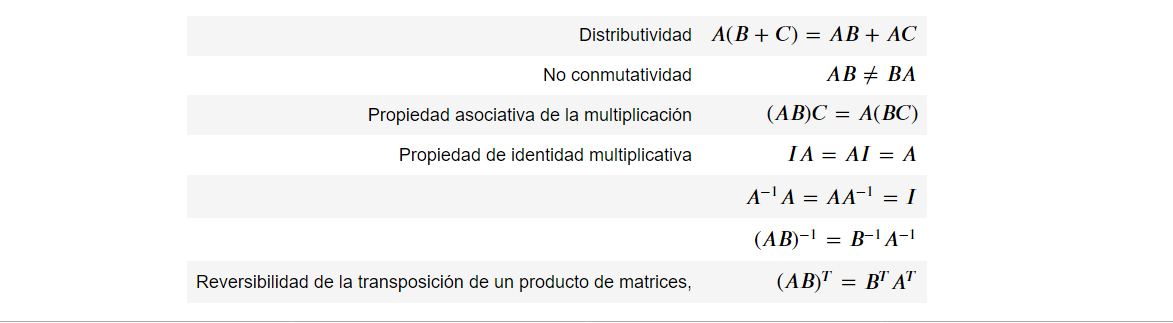

**Prueba analítica**

Delimitimemos lo siguiente que está enfocado a la definición de las variables que están dadas por las ecuaciones usadas para este caso:

- $X$ representa la matriz que contiene las observaciones con las características

- $w$ representa el vector de pesos de regresión

- $y$ este es el vector de las observaciones con el objetivo

- $P$ matriz aleatoria 

Teniendo lo anterior recordemos tambien lo siguiente:

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw  --> a = Xw
$$


Los datos ofuscados están definidos como:

$$
X' = X \times P
$$



Teniendo lo anterior declarado, vamos a realizar un poco de despejes en cuanto a las propiedades de álgebra lineal:

Apliquemos la propiedad de transposición reversa, tal y cómo índica el apendice de apéndice anexado.

$$
(AB)^T = B^T A ^T 
$$

entonces: 

$$
w' = (P^T X^TXP)^{-1} P^TX^Ty
$$

También apliquemos la identidad multiplicativa:

$$
w' = (P^T)^{-1}(X^TX)^{-1}P^{-1}P^TX^Ty
$$

Podemos notar que podemos multiplicar --> $$(P^T)^{-1}P^T = 1 $$

Por lo tanto, podemos decir que se realizó una reducción por términos semejantes y quedaría de la siguiente manera:

$$
w' = P^{-1}(X^TX)^{-1}X^Ty
$$


Sigamos teniendo en cuenta que la ecuación de entrenamiento y de predicción son las siguientes de forma respectiva:

- $$w = (X^TX)^{-1}X^Ty$$

- $$a = Xw$$


Veamos que va tomando cierta igualdad la ecuación reducida por términos semejantes respecto a la ya definida por la ecuación de entrenamiento.

Entonces:

$$
w' = P^{-1}w
$$


Teniendo lo anterior sabemos que:


- $$X' = XP$$
- $$w' = P^{-1}w$$
- $$a = Xw$$


Solo quedaría despejar para llegar a la misma igual de predicción:

$$ a' = X'w' => a' = XPw' => a' = XPP^{-1}w $$

Entonces queda de la siguiente manera:

$$ a' = Xw => a' = a $$


De esta forma, podemos mencionar que tanto los datos ofuscados y no ofuscados no tendrán repercusión en las métricas que se suelen evaluar en modelos de regresión.

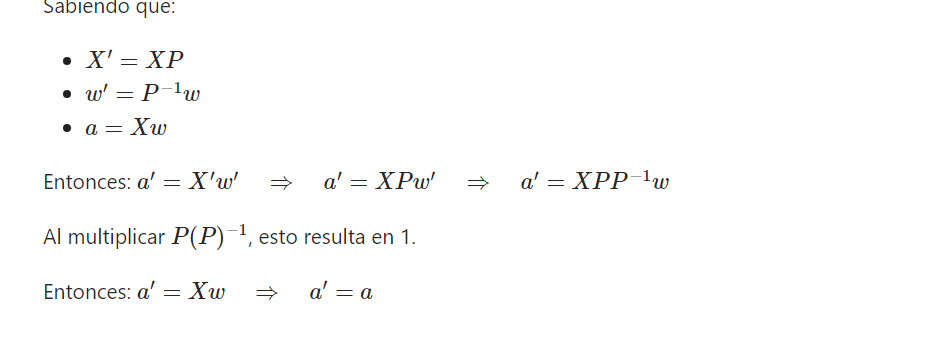

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.
- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [144]:
#Creación de la matriz cuadrada P

P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.55458479, 0.06381726, 0.82763117, 0.6316644 ],
       [0.75808774, 0.35452597, 0.97069802, 0.89312112],
       [0.7783835 , 0.19463871, 0.466721  , 0.04380377],
       [0.15428949, 0.68304895, 0.74476216, 0.96750973]])

In [145]:
#Comprobación de matriz invertible
P_inv = np.linalg.inv(P)
P_inv

array([[-3.30407744,  4.40917525, -0.27870525, -1.90039547],
       [-0.95858897, -1.33121709,  1.62644533,  1.78106755],
       [ 6.24868421, -7.35167522,  2.19103126,  2.60761164],
       [-3.6064091 ,  5.89580272, -2.79039845, -1.92803822]])

In [146]:
# Nueva matriz 

matrix_transform = X @ P
matrix_transform

array([[38639.61192648,  9669.36234036, 23190.73279719,  2210.88392315],
       [29613.59921434,  7413.26214186, 17780.79501291,  1706.59418123],
       [16368.03798301,  4097.69411797,  9829.29132098,   945.77959405],
       ...,
       [26402.67088459,  6606.70881345, 15842.74551115,  1504.74510208],
       [25470.83573786,  6374.59828217, 15286.19409605,  1455.56599951],
       [31624.3053122 ,  7913.00513211, 18977.62468933,  1805.03945649]])

In [148]:
#Vamos a aplicar nuevamente nuestra función con la regresión definida previamente con estos datos aleatorios

My_Linear_Reg(matrix_transform)


Peso
 [-0.944  2.324  0.016 -0.021 -0.07 ]

Estas métricas corresponden al dataset escalado
RMSE: 0.34
R2: 0.66


Curiosamente los valores del peso y los valores de las métricas con iguales respecto a los datos originales y los datos ofuscados.

En otras palabras, la ofuscación de los datos no comprometen estas métricas para los modelos de regresión.

# Conclusiones

A grandes rasgos podemos mencionar lo interesante y útil, en la extensión de la palabra para aplicar y saber lo que implica tareas asociadas con Álgebra Lineal y la ofuscación de datos.

Tal y como hemos aplicado en este proyecto, cada paso va asociado a datos y a métricas que nos índican cómo es que los datos, de acuerdo con el adecuado preprocesamiento de datos, se ven protegidos o cambiando sus valores con propiedades algebraícas. 

Cada tarea implica tanto los datos escalados y no escalados para poder realizar una comparativa de métricas usadas en tareas de regresión. 

De forma resumida y como pudimos observar, las métricas no cambian y se mantienen, lo interesante quizá, sería cómo poder impulsar o tener mejores valores como el F1 - Score o el R2, sin embargo, también es importante saber y mencionar que no siempre se podrán mejorar estas métricas o que tal vez tengamos los mejores valores en comparativa a otros modelos, estandarizaciones de datos, etc.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores
- [ ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [ ]  Se ha realizado la tarea 1
    - [ ]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ ]  Se probó el procedimiento para las cuatro combinaciones propuestas   
    - [ ]  Se respondieron las preguntas sobre la escala/distancia- 
- [ ]  Se ha realizado la tarea 2
    - [ ]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    
    - [ ]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.
- [ ]  Se ha realizado la tarea 3
    - [ ]  Se implementó la solución de regresión lineal mediante operaciones matriciales  
    - [ ]  Se calculó la RECM para la solución implementada
- [ ]  Se ha realizado la tarea 4
    - [ ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P  
    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos   
    - [ ]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    
    - [ ]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM
    - [ ]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

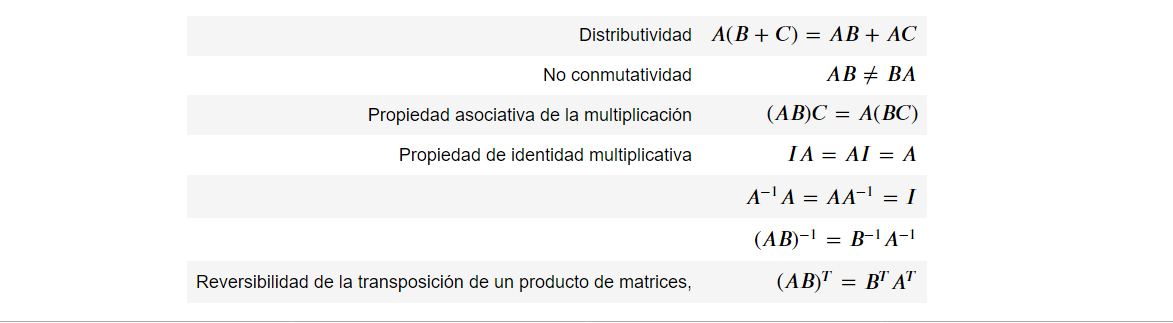